In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy  as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
# ruta de la imagen
ruta_imagen = 'caso1.png'
ruta_imagen1 = 'portal.png'
ruta_imagen2 = 'Crisp_dm.png'
ruta_imagen3 = 'ava.png'
ruta_imagen4 = 'herramientas.png'
ruta_imagen5 = 'CD.png'
ruta_imagen6 = 'ML.png'
ruta_imagen7 = 'Pobresa.png'
ruta_imagen8 = 'cluster.png'
ruta_imagen9 = 'regresion.png'
ruta_imagen10 = 'series.png'
ancho_imagen = 800  # especifica el ancho deseado en píxeles
alto_imagen = 600   # especifica el alto deseado en píxeles

# ¿Se puede crear casos de uso de analítica avanzada con la información que contiene la Plataforma Nacional de Datos Abiertos del Perú?

## **Secretaria de Gobierno y Transformación Digital**

### https://www.datosabiertos.gob.pe/

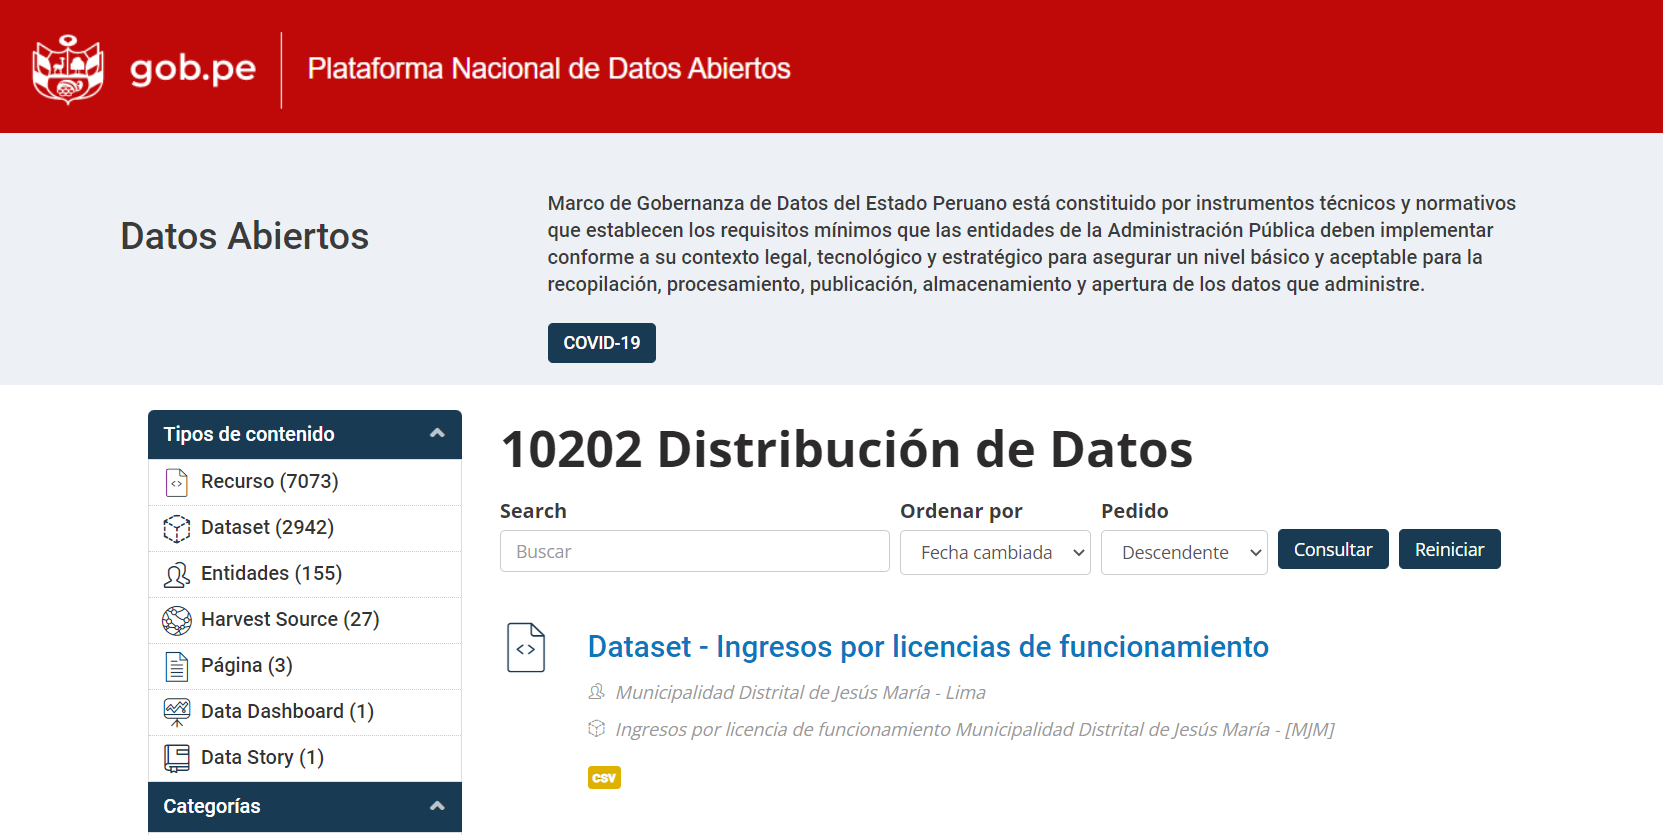

In [3]:
Image(filename=ruta_imagen1, width=ancho_imagen, height=alto_imagen)

## ¿Qué es Analítica Avanzada?

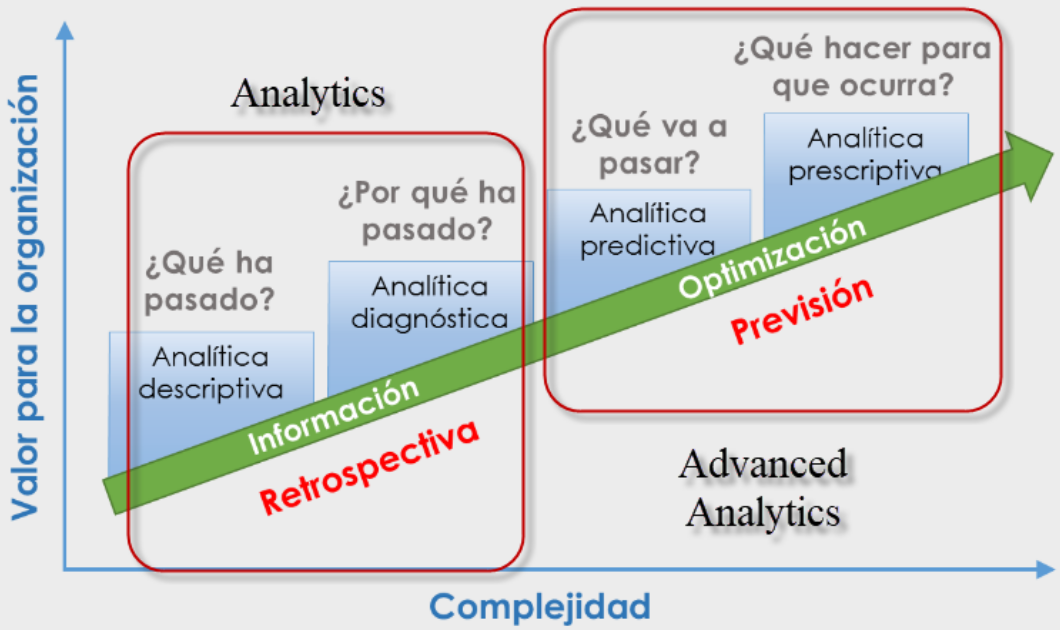

In [4]:
Image(filename=ruta_imagen3, width=ancho_imagen, height=alto_imagen)

## Metodología para proyectos de analítica avanzada CRISP-DM (Método orientado para trabajos de minería de datos)

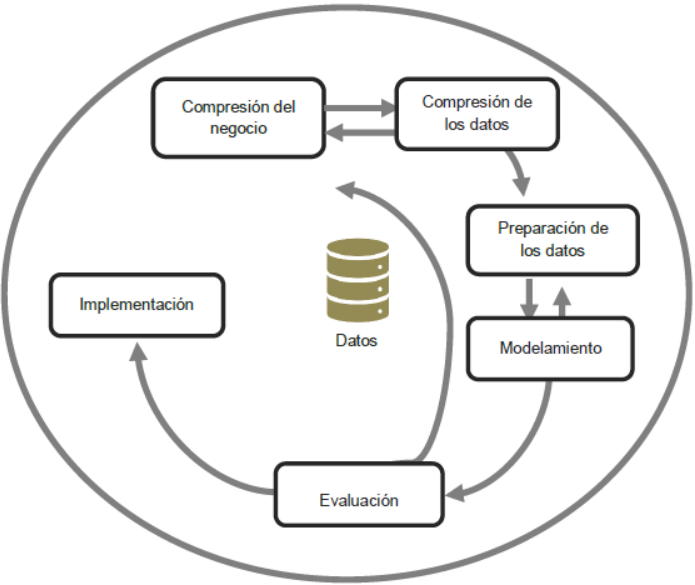

In [5]:
Image(filename=ruta_imagen2, width=ancho_imagen, height=alto_imagen)

## IA y Machine Learning

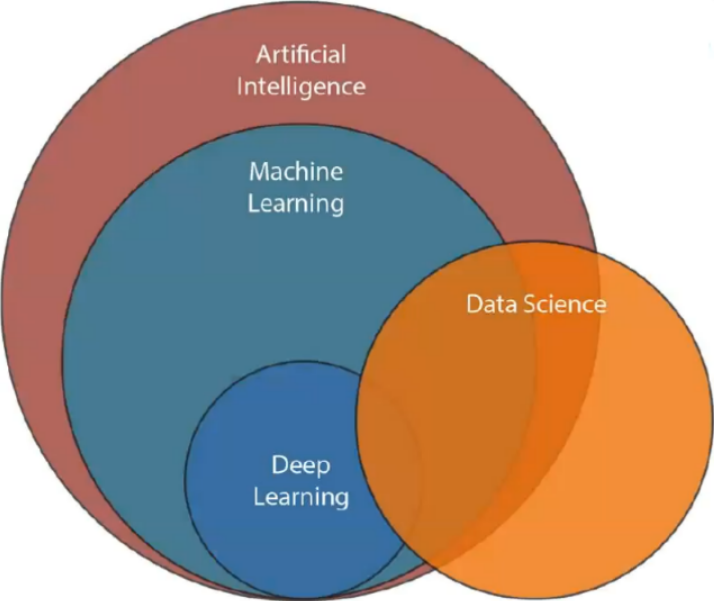

In [6]:
Image(filename=ruta_imagen5, width=ancho_imagen, height=alto_imagen)

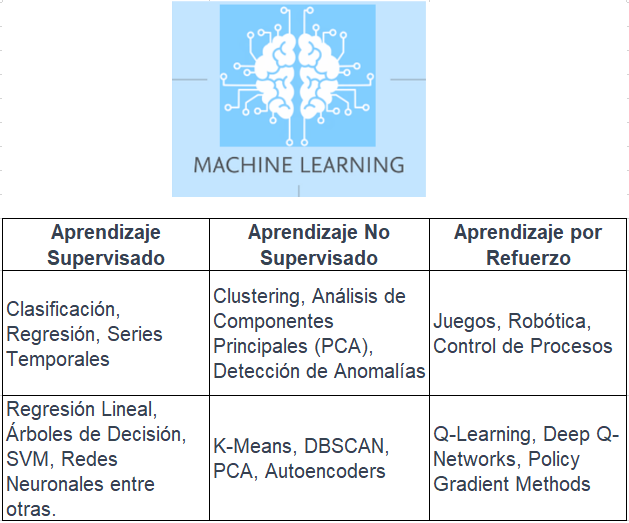

In [7]:
Image(filename=ruta_imagen6, width=ancho_imagen, height=alto_imagen)

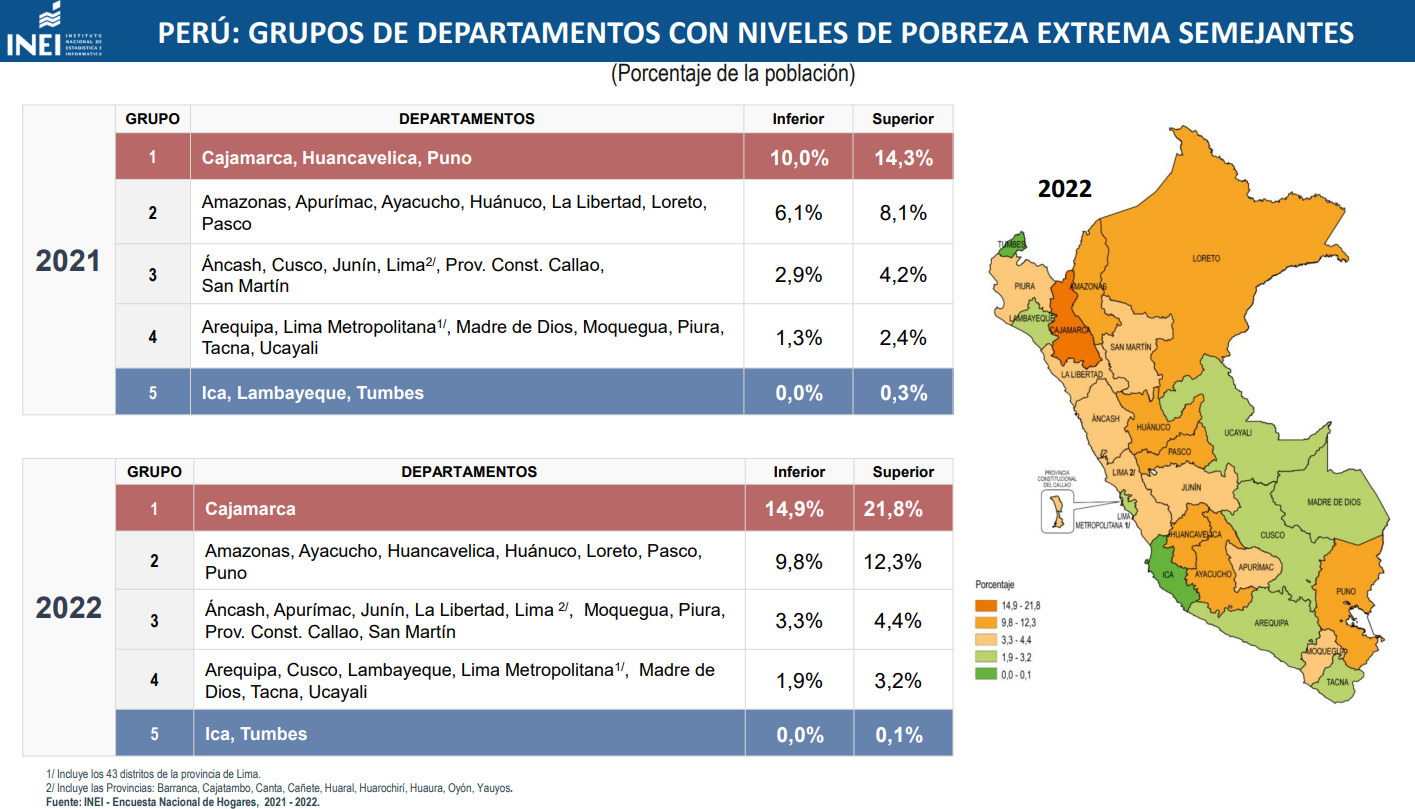

In [8]:
Image(filename=ruta_imagen7, width=ancho_imagen, height=alto_imagen)

## "*Entendimiento del negocio*"

### Recibos facturados por la prestación del servicio de agua – [Municipalidad Provincial de Cutervo]

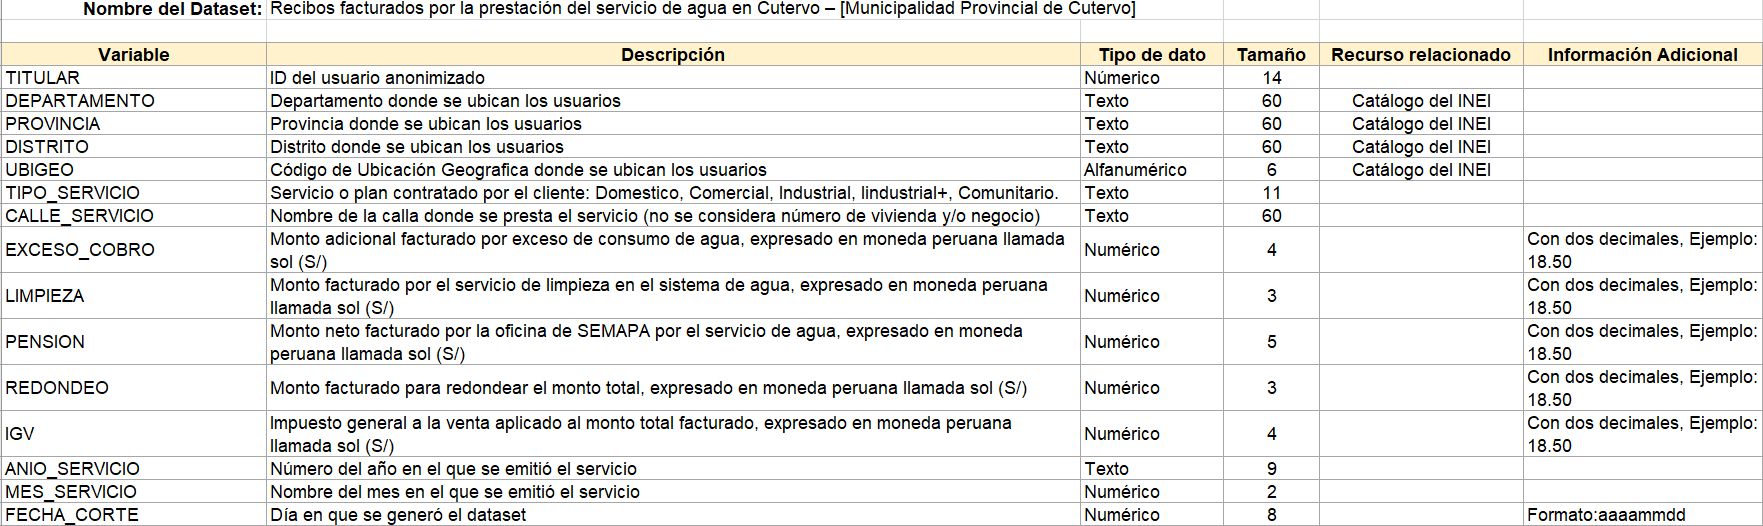

In [9]:
Image(filename=ruta_imagen, width=ancho_imagen, height=alto_imagen)

### Casos de Uso

**1. Qué casos de uso puedo obtener de la información** 
    
   **1.1 Perfilar a los usuarios "Clustering"**
    
Quiero saber quienes son los usuarios que pagan mas en exceso de cobro, quienes facturan mas; esto me ayudara a identificar grupos de usuarios con perfiles de facturación similares.      

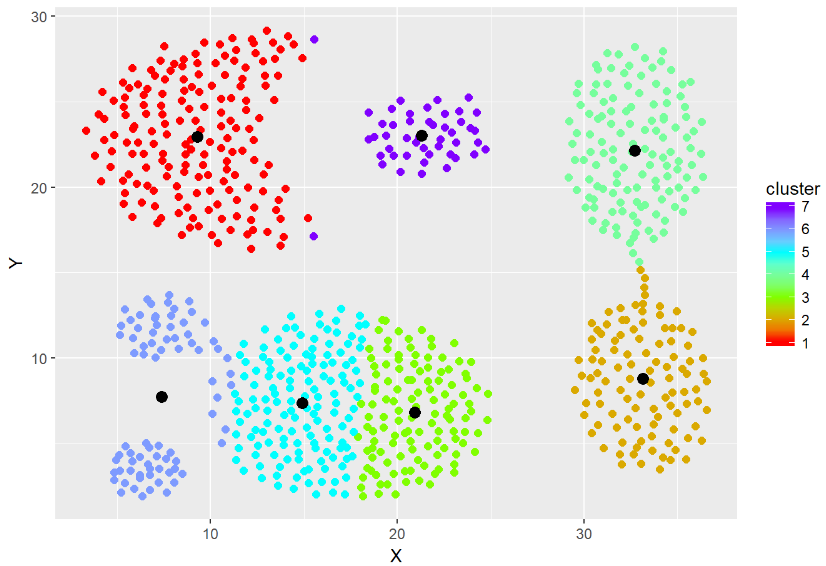

In [10]:
Image(filename=ruta_imagen8, width=ancho_imagen, height=alto_imagen)

   **1.2 Predecir el IGV facturar**
       
Optimización de precios: La capacidad de predecir el IGV puede ayudar al negocio a optimizar los precios de los servicios de agua. Al comprender cómo el impuesto afecta el monto total facturado, el negocio puede ajustar sus precios para maximizar los ingresos o ser más competitivo en el mercado.

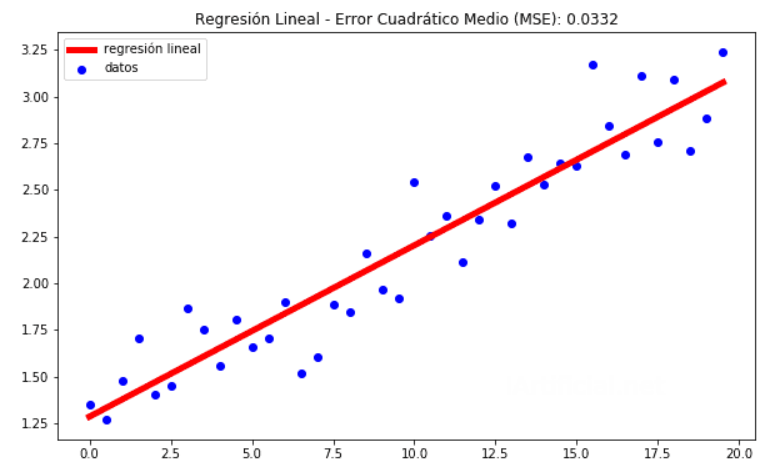

In [5]:
Image(filename=ruta_imagen9, width=ancho_imagen, height=alto_imagen)

   **1.3 Predecir usuarios para los años 2023-2024-2025-2026**

En este caso de uso vamos a predecir la cantidad de usuarios que se tendran para el consumo de agua de los próximos años

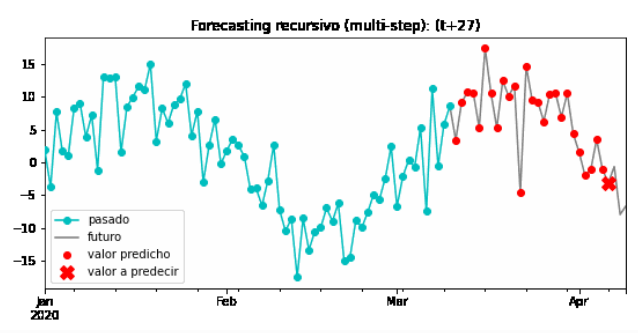

In [12]:
Image(filename=ruta_imagen10, width=ancho_imagen, height=alto_imagen)

## "*Entendimiento de los datos*"

### Leemos el dataset

In [13]:
data = pd.read_csv('data/Recibos_facturados_prestacion_agua_Cutervo.csv', delimiter=';', encoding='latin1')

In [14]:
df = data.copy()

In [15]:
# Información detalle
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358685 entries, 0 to 358684
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USUARIO         358685 non-null  object 
 1   DEPARTAMENTO    358685 non-null  object 
 2   PROVINCIA       358685 non-null  object 
 3   DISTRITO        358685 non-null  object 
 4   UBIGEO          358685 non-null  int64  
 5   TIPO_SERVICIO   358685 non-null  object 
 6   CALLE_SERVICIO  358685 non-null  object 
 7   EXCESO_COBRO    358685 non-null  float64
 8   LIMPIEZA        358685 non-null  float64
 9   PENSION         358685 non-null  float64
 10  REDONDEO        358685 non-null  float64
 11  IGV             358685 non-null  float64
 12  ANIO_SERVICIO   358685 non-null  int64  
 13  MES_SERVICIO    358685 non-null  object 
 14  FECHA_CORTE     358685 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 41.0+ MB


In [16]:
# Visualizar los datos
data.head()

,USUARIO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,TIPO_SERVICIO,CALLE_SERVICIO,EXCESO_COBRO,LIMPIEZA,PENSION,REDONDEO,IGV,ANIO_SERVICIO,MES_SERVICIO,FECHA_CORTE
0,USER060-1,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510
1,USER060-2,CAJAMARCA,CUTERVO,CUTERVO,60601,INDUSTRIAL,22 DE OCTUBRE,0.0,4.2,12.25,0.04,2.21,2014,JUNIO,20230510
2,USER060-3,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510
3,USER060-4,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510
4,USER060-5,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510


### Análisis Estadístico descriptivo

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UBIGEO,358685.0,6.060100e+04,0.000000,60601.00,60601.0,60601.0,60601.00,60601.00
EXCESO_COBRO,358685.0,7.532110e-02,1.387440,0.00,0.0,0.0,0.00,43.20
LIMPIEZA,358685.0,2.903415e+00,1.032408,0.00,2.8,2.8,2.80,4.20
PENSION,358685.0,7.627035e+00,3.269065,0.17,6.1,6.1,7.62,130.20
REDONDEO,358685.0,3.752847e-03,0.008824,0.00,0.0,0.0,0.00,0.10
IGV,358685.0,1.217846e+00,0.379469,0.00,1.1,1.1,1.10,23.44
ANIO_SERVICIO,358685.0,2.018442e+03,2.447470,2014.00,2016.0,2019.0,2021.00,2022.00
FECHA_CORTE,358685.0,2.023051e+07,0.000000,20230510.00,20230510.0,20230510.0,20230510.00,20230510.00


### Verificamos valores nulos

In [18]:
nas = pd.DataFrame(data.isnull().sum()).sort_values(0,ascending=True)
nas.columns = ['nas']
nas['nas%'] = round(nas['nas']/data.shape[0], 2)
nas = nas[nas['nas%'] > 0.00]
nas.head(50) #.index

,nas,nas%


### Análisis Univariado

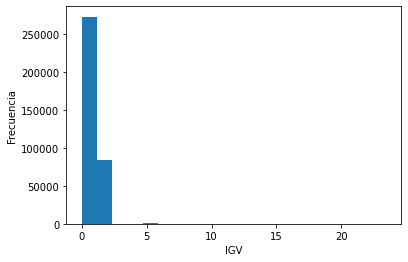

In [19]:
# Histograma de la variable 'IGV'
plt.hist(data['IGV'], bins=20)
plt.xlabel('IGV')
plt.ylabel('Frecuencia')
plt.show()

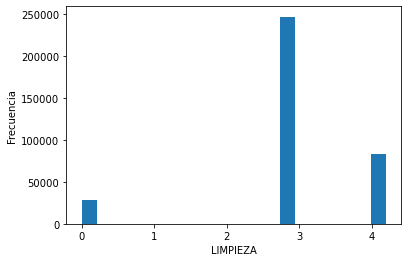

In [20]:
# Histograma de la variable 'LIMPIEZA'
plt.hist(data['LIMPIEZA'], bins=20)
plt.xlabel('LIMPIEZA')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
# Seleccionar las variables numéricas para el clustering
numeric_vars = ['EXCESO_COBRO', 'LIMPIEZA', 'PENSION', 'REDONDEO', 'IGV']

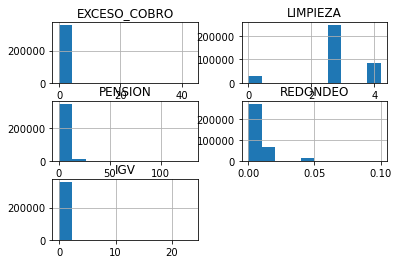

In [22]:
data[numeric_vars].hist()
plt.show()

## Análisis Bivariado

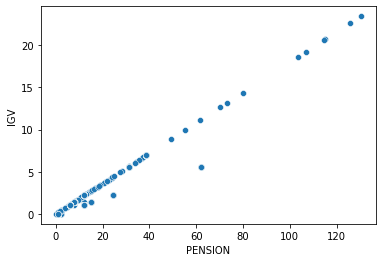

In [23]:
# Gráfico de dispersión de las variables 'REDONDEO' e 'PENSION'
sns.scatterplot(data=data, x='PENSION', y='IGV')
plt.show()

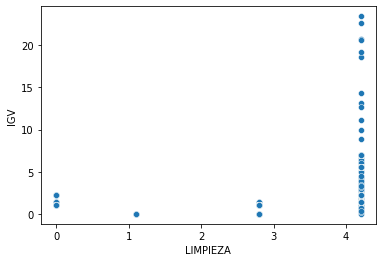

In [24]:
# Gráfico de dispersión de las variables 'EXCESO_COBRO' e 'PENSION'
sns.scatterplot(data=data, x='LIMPIEZA', y='IGV')
plt.show()

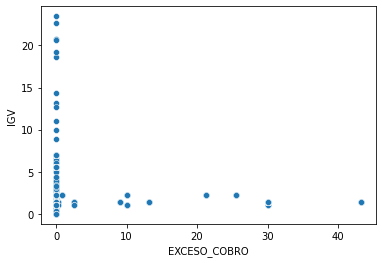

In [25]:
# Gráfico de dispersión de las variables 'edad' e 'ingreso'
sns.scatterplot(data=data, x='EXCESO_COBRO', y='IGV')
plt.show()

## "*Preparación de los datos*"

### Variables Categóricas

### Tipo de Servicio

In [26]:
data.TIPO_SERVICIO.value_counts()

DOMESTICO      272603
COMERCIAL       69233
INDUSTRIAL      15420
INDUSTRIAL+      1407
COMUNITARIO        22
Name: TIPO_SERVICIO, dtype: int64

### Aplicar One-Hot Encoding

In [27]:
# Creamos las variables binarias
dummies = pd.get_dummies(data['TIPO_SERVICIO'])
dummies.head()

,COMERCIAL,COMUNITARIO,DOMESTICO,INDUSTRIAL,INDUSTRIAL+
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [28]:
# Añadimos las variables binarias al DataFrame
data = pd.concat([data, dummies], axis = 1)

# Eliminamos la vairable original race
data = data.drop(columns=['TIPO_SERVICIO'])

### Calle Servicio

In [29]:
data.CALLE_SERVICIO.value_counts()

22 DE OCTUBRE               32316
JR. COMERCIO                20974
JR. AMERICA                 20974
SANTA ROSA                  16871
RAMON CASTILLA              16276
                            ...  
LAS TOTORAS - KUTERMUSAI        8
PRECURSORES                     4
CALLE LOS DURAZNOS              3
JR. LA RETAMA                   2
PASAJE 01                       2
Name: CALLE_SERVICIO, Length: 151, dtype: int64

### Aplicar Frecuency Encoding

In [30]:
freq_d = data['CALLE_SERVICIO'].value_counts(normalize=True)
freq_CALLE_SERVICIO = freq_d.to_dict()
data['CALLE_SERVICIO'] = data['CALLE_SERVICIO'].map(freq_CALLE_SERVICIO)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358685 entries, 0 to 358684
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USUARIO         358685 non-null  object 
 1   DEPARTAMENTO    358685 non-null  object 
 2   PROVINCIA       358685 non-null  object 
 3   DISTRITO        358685 non-null  object 
 4   UBIGEO          358685 non-null  int64  
 5   CALLE_SERVICIO  358685 non-null  float64
 6   EXCESO_COBRO    358685 non-null  float64
 7   LIMPIEZA        358685 non-null  float64
 8   PENSION         358685 non-null  float64
 9   REDONDEO        358685 non-null  float64
 10  IGV             358685 non-null  float64
 11  ANIO_SERVICIO   358685 non-null  int64  
 12  MES_SERVICIO    358685 non-null  object 
 13  FECHA_CORTE     358685 non-null  int64  
 14  COMERCIAL       358685 non-null  uint8  
 15  COMUNITARIO     358685 non-null  uint8  
 16  DOMESTICO       358685 non-null  uint8  
 17  INDUSTRIAL

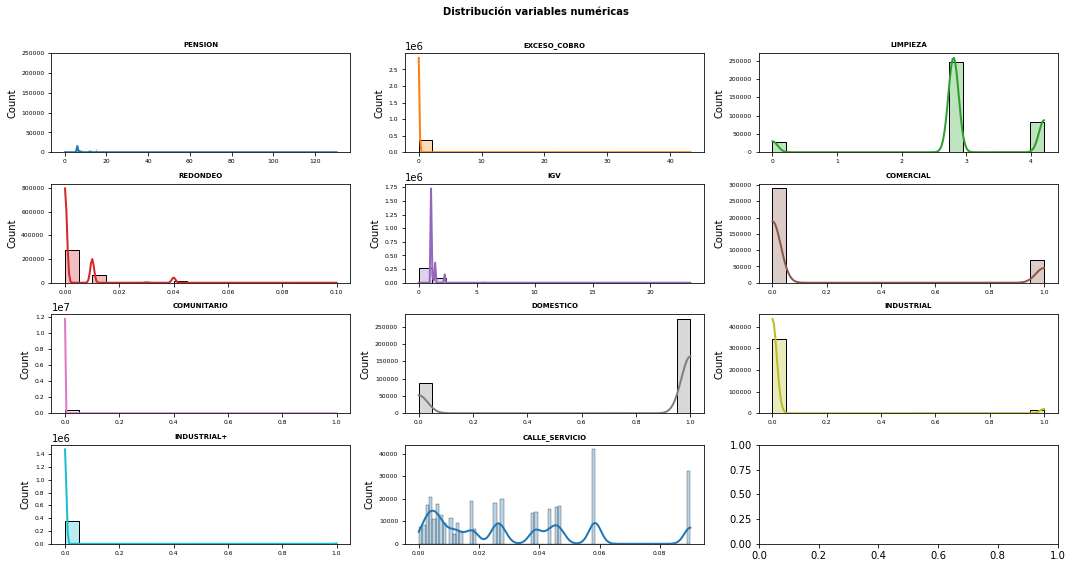

In [32]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 8))
axes = axes.flat
columnas_numeric = ['PENSION','EXCESO_COBRO', 'LIMPIEZA', 'REDONDEO', 'IGV','COMERCIAL','COMUNITARIO','DOMESTICO','INDUSTRIAL','INDUSTRIAL+','CALLE_SERVICIO']
#columnas_numeric = columnas_numeric.drop('num_ruc')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [33]:
print(data[['PENSION', 'IGV']].corr())

          PENSION       IGV
PENSION  1.000000  0.699389
IGV      0.699389  1.000000


In [34]:
variables = ['PENSION','EXCESO_COBRO', 'LIMPIEZA', 'REDONDEO', 'IGV']

### Matriz de correlaciones

In [35]:
correlation_matrix = data[variables].corr()

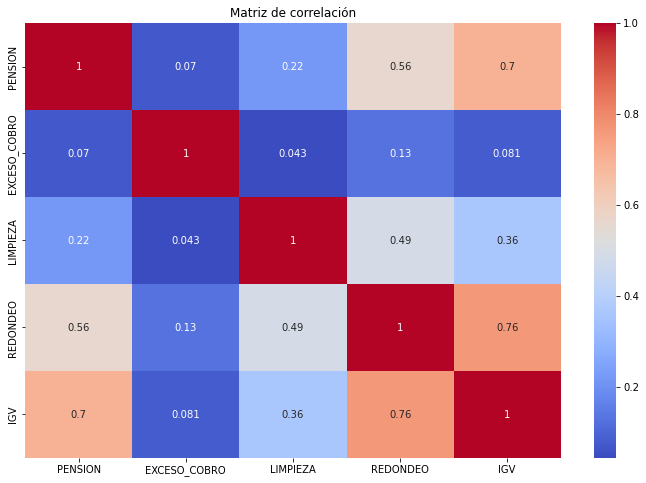

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## "*Modelos para los casos de usos*"

### Caso de uso 1: Modelo No Supervisado Clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
X = np.array(data[['EXCESO_COBRO', 'LIMPIEZA', 'PENSION', 'REDONDEO', 'IGV','COMERCIAL','COMUNITARIO','DOMESTICO','INDUSTRIAL','INDUSTRIAL+','CALLE_SERVICIO']])
X.shape

(358685, 11)

### Cluster óptimo

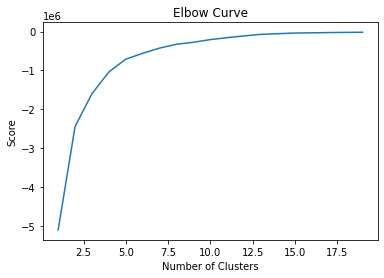

In [39]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Clustering

In [40]:
var_model = ['EXCESO_COBRO', 'LIMPIEZA', 'PENSION', 'REDONDEO', 'IGV','COMERCIAL','COMUNITARIO','DOMESTICO','INDUSTRIAL','INDUSTRIAL+','CALLE_SERVICIO']

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[var_model])

# Aplicar el algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(normalized_data)

# Obtener las etiquetas de los clusters asignados a cada muestra
cluster_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Agregar las etiquetas al dataframe original
data['Cluster'] = cluster_labels

# Ver los resultados
print(data['Cluster'].value_counts())

0    272637
2     69223
1     15406
3      1419
Name: Cluster, dtype: int64


### Mostramos gráficamente los clusters

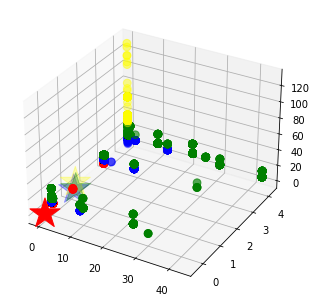

In [42]:
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
#colores=['red','green','blue','orange','purple','cyan',]
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

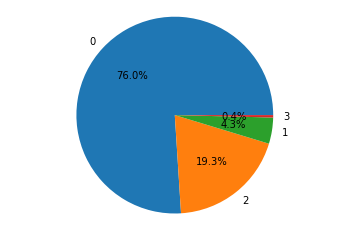

In [43]:
import matplotlib.pyplot as plt

# Contar la cantidad de muestras en cada cluster
cluster_counts = data['Cluster'].value_counts()

# Graficar el resultado en un gráfico de torta
labels = cluster_counts.index
sizes = cluster_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # asegurarnos de que el gráfico sea un círculo
plt.show()

### Interpretamos el Clustering

In [44]:
# Calculamos la media de cada variable en cada cluster
cluster_means = data.groupby('Cluster').mean()

# Mostramos las medias de cada variable en cada cluster
print(cluster_means)

          UBIGEO  CALLE_SERVICIO  EXCESO_COBRO  LIMPIEZA    PENSION  REDONDEO  \
Cluster                                                                         
0        60601.0        0.027535      0.007798  2.533272   6.874497  0.000004   
1        60601.0        0.042528      0.900584  4.096313  14.180391  0.039892   
2        60601.0        0.042972      0.159141  4.069370   8.632588  0.009966   
3        60601.0        0.049070      0.000000  4.190134  32.011360  0.028576   

              IGV  ANIO_SERVICIO  FECHA_CORTE  COMERCIAL  COMUNITARIO  \
Cluster                                                                 
0        1.099962    2018.494449   20230510.0   0.000011     0.000000   
1        2.231753    2018.116124   20230510.0   0.001947     0.001428   
2        1.369806    2018.261503   20230510.0   0.999494     0.000000   
3        5.446413    2020.589147   20230510.0   0.008457     0.000000   

         DOMESTICO  INDUSTRIAL  INDUSTRIAL+  
Cluster                     

### Incluimos resultados al dataset inicial para toma de decisiones

In [45]:
labels = kmeans.labels_

In [46]:
df['cluster'] = labels

In [47]:
df.head()

,USUARIO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,TIPO_SERVICIO,CALLE_SERVICIO,EXCESO_COBRO,LIMPIEZA,PENSION,REDONDEO,IGV,ANIO_SERVICIO,MES_SERVICIO,FECHA_CORTE,cluster
0,USER060-1,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510,0
1,USER060-2,CAJAMARCA,CUTERVO,CUTERVO,60601,INDUSTRIAL,22 DE OCTUBRE,0.0,4.2,12.25,0.04,2.21,2014,JUNIO,20230510,1
2,USER060-3,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510,0
3,USER060-4,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510,0
4,USER060-5,CAJAMARCA,CUTERVO,CUTERVO,60601,DOMESTICO,22 DE OCTUBRE,0.0,2.8,6.10,0.00,1.10,2014,JUNIO,20230510,0


### Caso de uso 2: Modelo Predictivo Supervisado Predicción IGV

In [76]:
# Selección de variables
X = data[['EXCESO_COBRO', 'PENSION', 'LIMPIEZA','COMERCIAL','REDONDEO','COMUNITARIO','INDUSTRIAL','INDUSTRIAL+']]
y = data['IGV']

# Normalizar los datos
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Comparamos con otros modelos

In [77]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
# Definir y entrenar modelos
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor(random_state=42)
model = LinearRegression().fit(X_train, y_train)
tree_model.fit(X_train, y_train)

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
ind = pd.DataFrame(columns = ['Modelo', 'R2'])

In [80]:
# Realizar predicciones y evaluar modelos
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
ind = ind.append({'Modelo' : 'LogReg', 'R2' : linear_r2}, ignore_index = True)
ind

,Modelo,R2
0,LogReg,0.86799


In [81]:
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
ind = ind.append({'Modelo' : 'Decision Tree Regression', 'R2' : tree_r2}, ignore_index = True)
ind

,Modelo,R2
0,LogReg,0.86799
1,Decision Tree Regression,0.999379


In [82]:
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)
ind = ind.append({'Modelo' : 'Random Forest Regression', 'R2' : forest_r2}, ignore_index = True)
ind

,Modelo,R2
0,LogReg,0.86799
1,Decision Tree Regression,0.999379
2,Random Forest Regression,0.999456


In [92]:
# Definir y entrenar modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Realizar predicciones y evaluar modelo
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Imprimir resultados
print("XGBoost Regression:")
print("R2:", xgb_r2)

XGBoost Regression:
R2: 0.9994810229430359


## "*Evaluación de Modelos*"

In [84]:
ind = ind.append({'Modelo' : 'XGBoost Regression', 'R2' : xgb_r2}, ignore_index = True)
ind

,Modelo,R2
0,LogReg,0.86799
1,Decision Tree Regression,0.999379
2,Random Forest Regression,0.999456
3,XGBoost Regression,0.999481



------------>We decide from the Bar Graph that the best Model is <------------


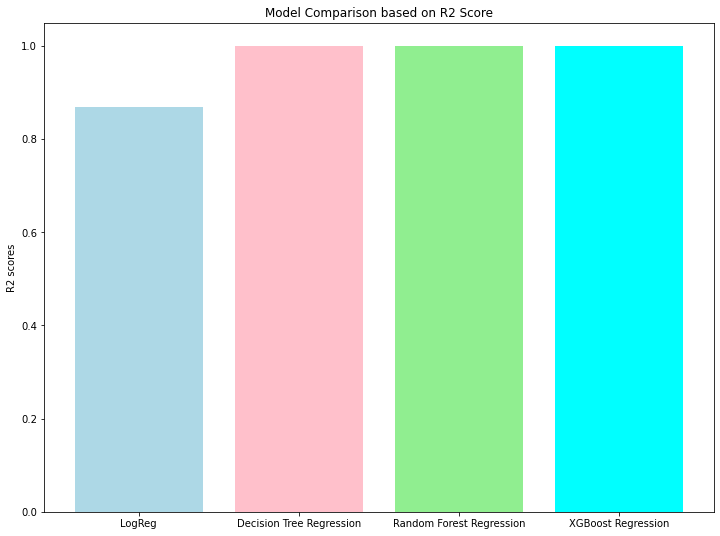

In [85]:
#------------>Finding the Best Algorithm<----------

print("\n------------>We decide from the Bar Graph that the best Model is <------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(ind.Modelo, ind.R2, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("R2 scores")
plt.title("Model Comparison based on R2 Score")
plt.show()

In [86]:
# Crear un dataframe con los valores reales y predichos
results_df = pd.DataFrame({'actual': y_test, 'predicted': forest_predictions})

### Análisis de resultado

In [91]:
forest_predictions = forest_model.predict(X_test)
forest_r2 = r2_score(y_test, forest_predictions)
print("R2:", forest_r2)

R2: 0.9994560202689912


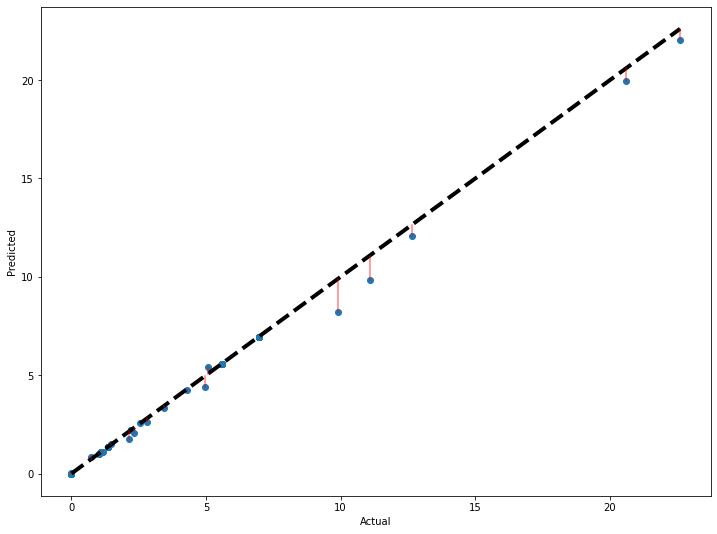

In [88]:
# Crear un scatter plot con una línea de regresión y líneas verticales para representar las distancias
fig, ax = plt.subplots()
ax.scatter(results_df['actual'], results_df['predicted'])
ax.plot([results_df['actual'].min(), results_df['actual'].max()], [results_df['actual'].min(), results_df['actual'].max()], 'k--', lw=4)
for index, row in results_df.iterrows():
    ax.plot([row['actual'], row['actual']], [row['actual'], row['predicted']], 'r-', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [89]:
#results_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
# Crear un dataframe con las tres columnas
results = pd.DataFrame({'actual': y_test, 'predicted': forest_predictions})
results.head()

,actual,predicted
301241,1.1,1.1
256539,1.1,1.1
231554,1.1,1.1
124100,1.1,1.1
217242,1.1,1.1


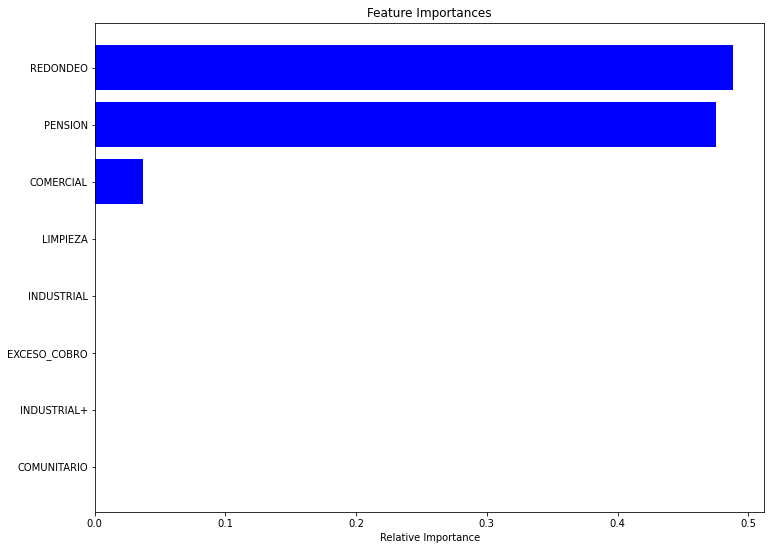

In [90]:
importances = forest_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Caso de uso 3: Series temporales predicción de usuarios para el año 2023-2026

In [66]:
data.ANIO_SERVICIO.value_counts()

2020    46613
2021    46388
2022    45658
2019    45441
2018    43376
2016    37454
2017    37253
2015    36076
2014    20426
Name: ANIO_SERVICIO, dtype: int64

In [67]:
# Calcular el conteo de usuarios por año
frecuencia_por_anio = data.ANIO_SERVICIO.value_counts().reset_index()

# Renombrar las columnas
frecuencia_por_anio.columns = ['Anio', 'Usuarios']

# Ordenar el DataFrame por el año
frecuencia_por_anio.sort_values('Anio', inplace=True)

# Mostrar el DataFrame resultante
frecuencia_por_anio.head()

,Anio,Usuarios
8,2014,20426
7,2015,36076
5,2016,37454
6,2017,37253
4,2018,43376


C:\Users\maxmu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\maxmu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\maxmu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


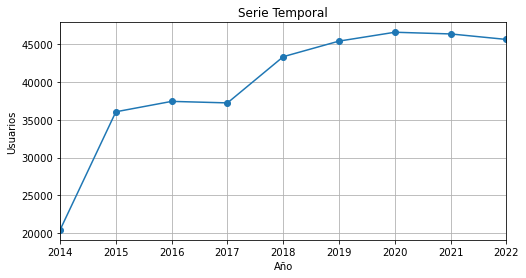

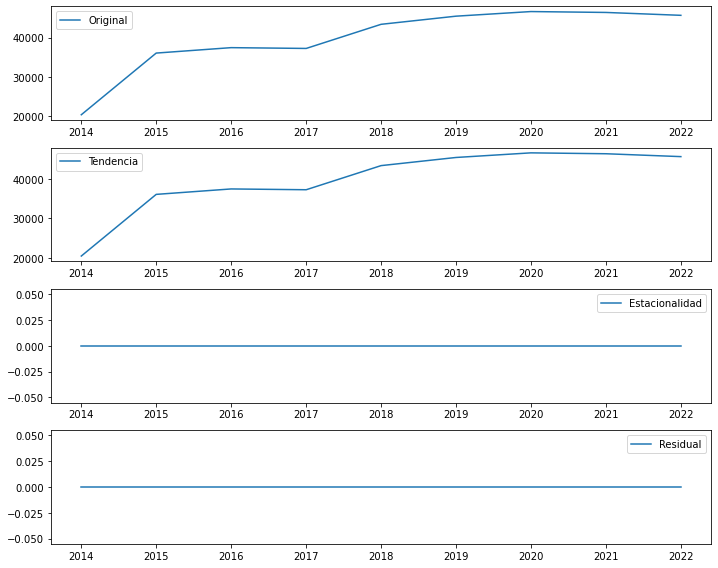

In [68]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Establecer 'ANIO_SERVICIO' como índice
frecuencia_por_anio.set_index('Anio', inplace=True)

# Convertir el índice a formato datetime
frecuencia_por_anio.index = pd.to_datetime(frecuencia_por_anio.index, format='%Y')

# Crear una serie temporal con frecuencia anual
time_series = pd.Series(frecuencia_por_anio['Usuarios'], index=frecuencia_por_anio.index)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = time_series.loc[:'2022']
test_data = time_series.loc['2023':]

# Crear y ajustar el modelo ARIMA
model = sm.tsa.ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Realizar predicciones en los datos de prueba
predictions = model_fit.predict(start='2023', end='2024')

test_data = pd.concat([test_data, predictions])

# Realizar predicciones en datos futuros
future_predictions = model_fit.predict(start='2025', end='2026')
future_data = pd.Series(future_predictions, index=pd.date_range(start='2025', end='2026'))

test_data = pd.concat([test_data, future_data])

# Visualizar la serie temporal
plt.figure(figsize=(8, 4))
time_series.plot(marker='o')
plt.xlabel('Año')
plt.ylabel('Usuarios')
plt.title('Serie Temporal')
plt.grid(True)
plt.show()

# Descomposición de la serie temporal
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualizar las componentes de la descomposición
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [69]:
print(predictions)

2023-01-01    44996.345842
2024-01-01    43527.352471
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [70]:
print(future_predictions)

2025-01-01    42475.540110
2026-01-01    41722.433074
Freq: AS-JAN, Name: predicted_mean, dtype: float64


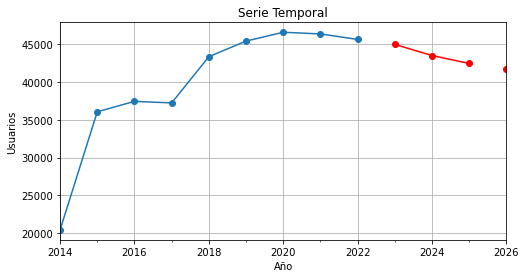

In [71]:
# Visualizar la serie temporal
plt.figure(figsize=(8, 4))
time_series.plot(marker='o')
test_data.plot(marker='o', color='red')  # Agregar los datos de prueba y predicciones
plt.xlabel('Año')
plt.ylabel('Usuarios')
plt.title('Serie Temporal')
plt.grid(True)
plt.show()

### Guardamos el dataset

In [72]:
df.to_csv("Clustering.csv")

## Fin de los casos de Uso